In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Загружаем данные (если ты ещё не сделал этого)
california = fetch_california_housing()
X = california.data  # Признаки
y = california.target  # Целевая переменная (цены домов)

# Разделяем данные на тренировочные и тестовые (как в твоём задании 4)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123)

In [2]:
# Шаг 1: Преобразуем задачу регрессии в задачу классификации
# Определяем порог: дом дорогой, если цена >= 3.0 (300 000 долларов)
threshold = 3.0
ytrain_class = np.where(ytrain >= threshold, 1, 0)  # 1 - дорогой, 0 - недорогой
ytest_class = np.where(ytest >= threshold, 1, 0)

# Посмотрим, сколько домов в каждом классе
print('Дорогих домов в тренировочной выборке:', np.sum(ytrain_class == 1))
print('Недорогих домов в тренировочной выборке:', np.sum(ytrain_class == 0))
print('Дорогих домов в тестовой выборке:', np.sum(ytest_class == 1))
print('Недорогих домов в тестовой выборке:', np.sum(ytest_class == 0))

Дорогих домов в тренировочной выборке: 2922
Недорогих домов в тренировочной выборке: 12558
Дорогих домов в тестовой выборке: 944
Недорогих домов в тестовой выборке: 4216


### Шаг 2: Масштабируем данные
### Логистическая регрессия чувствительна к масштабу признаков


In [3]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### Шаг 3: Обучаем логистическую регрессию

In [4]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(Xtrain_scaled, ytrain_class)

LogisticRegression(max_iter=1000, random_state=42)

### Шаг 4: Делаем предсказания
#### Предсказываем классы (0 или 1)

In [5]:
y_pred_class = logreg_model.predict(Xtest_scaled)
# Предсказываем вероятности
y_pred_prob = logreg_model.predict_proba(Xtest_scaled)[:, 1]  # Вероятность класса 1 (дорогой)

### Шаг 5: Оцениваем качество модели
#### Точность (доля правильно классифицированных домов)

Точность на тестовых данных: 0.8895348837209303
Отчёт по классификации:
               precision    recall  f1-score   support

   Недорогой       0.90      0.97      0.93      4216
     Дорогой       0.80      0.52      0.63       944

    accuracy                           0.89      5160
   macro avg       0.85      0.75      0.78      5160
weighted avg       0.88      0.89      0.88      5160



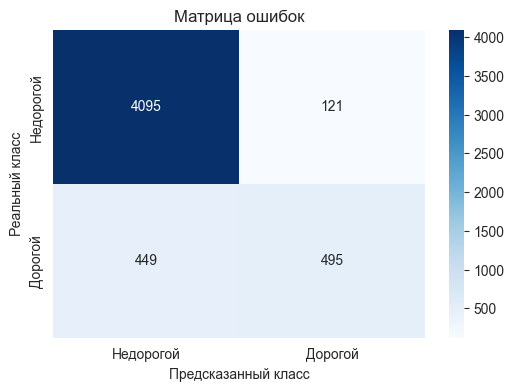

In [6]:
accuracy = accuracy_score(ytest_class, y_pred_class)
print('Точность на тестовых данных:', accuracy)

# Подробный отчёт: precision, recall, f1-score
print('Отчёт по классификации:\n', classification_report(ytest_class, y_pred_class, target_names=['Недорогой', 'Дорогой']))

# Матрица ошибок (confusion matrix)
conf_matrix = confusion_matrix(ytest_class, y_pred_class)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Недорогой', 'Дорогой'], yticklabels=['Недорогой', 'Дорогой'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.title('Матрица ошибок')
plt.show()

### Шаг 6: Пример предсказания для одного дома
#### Возьмём первый дом из тестовой выборки

In [7]:
example_house = Xtest_scaled[0:1]  # Первый дом
example_true_class = ytest_class[0]  # Реальный класс
example_pred_class = logreg_model.predict(example_house)[0]  # Предсказанный класс
example_pred_prob = logreg_model.predict_proba(example_house)[0, 1]  # Вероятность класса "Дорогой"

print('Пример предсказания для одного дома:')
print('Реальная цена дома:', ytest[0])
print('Реальный класс (0 - недорогой, 1 - дорогой):', example_true_class)
print('Предсказанный класс:', example_pred_class)
print('Вероятность, что дом дорогой:', example_pred_prob)

Пример предсказания для одного дома:
Реальная цена дома: 1.516
Реальный класс (0 - недорогой, 1 - дорогой): 0
Предсказанный класс: 0
Вероятность, что дом дорогой: 0.1769563267210354


### Шаг 7: Сравнение с линейной регрессией (твоя исходная модель)
#### Мы можем использовать предсказания линейной регрессии, чтобы классифицировать дома

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучаем линейную регрессию (как в твоём задании 4)
lr_model = LinearRegression()
lr_model.fit(Xtrain_scaled, ytrain)

# Предсказываем цены на тестовых данных
y_pred_lr = lr_model.predict(Xtest_scaled)

# Преобразуем предсказанные цены в классы с тем же порогом
y_pred_lr_class = np.where(y_pred_lr >= threshold, 1, 0)

# Сравниваем точность
accuracy_lr = accuracy_score(ytest_class, y_pred_lr_class)
print('Точность линейной регрессии (преобразованной в классификацию):', accuracy_lr)
print('MSE линейной регрессии (для справки):', mean_squared_error(ytest, y_pred_lr))

Точность линейной регрессии (преобразованной в классификацию): 0.8856589147286822
MSE линейной регрессии (для справки): 0.5162987734042896


### Шаг 8: Визуализация вероятностей
#### Построим гистограмму вероятностей для тестовых данных

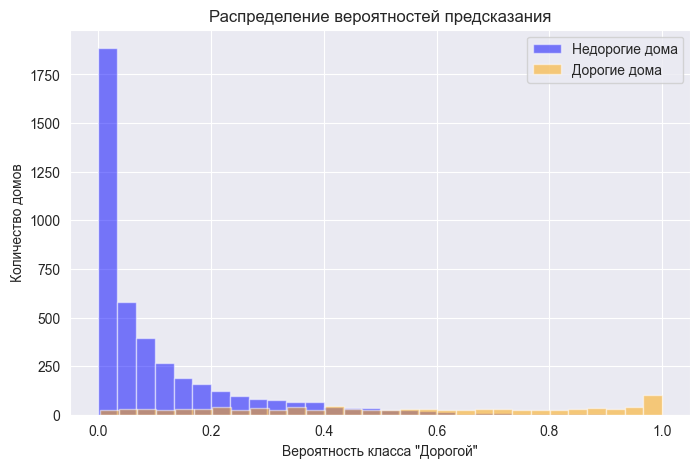

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(y_pred_prob[ytest_class == 0], bins=30, alpha=0.5, label='Недорогие дома', color='blue')
plt.hist(y_pred_prob[ytest_class == 1], bins=30, alpha=0.5, label='Дорогие дома', color='orange')
plt.xlabel('Вероятность класса "Дорогой"')
plt.ylabel('Количество домов')
plt.title('Распределение вероятностей предсказания')
plt.legend()
plt.show()